In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 68.4 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=aea81efbb03ad4bc33a714a3569c7115f3241d32167065440844458cc8a2e978
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.6 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=f6239f1b9ca1458b02dfd85340e72a8ee7422140b8bc65d138e8df715005072d
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=386241b3bd469d37538f0b533905e20e58dab460a92a15

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [5]:
book = "Marie Curie_ A Biography (Greenwood Biographies) ( PDFDrive )"
startdate = 1700
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Marie_Curie"
titlename = "Marie_Curie"

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [8]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

11
1/chapter_1


2023-04-09 13:05:50,712 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9
1/chapter_10
1/chapter_11


In [9]:
mp_bert

{'1/chapter_1': [('bronislawa sklodowska', 0.527),
  ('sklodowski children', 0.5066),
  ('bronislawa', 0.4804),
  ('polishhistory', 0.4709),
  ('wladyslaw sklodowski', 0.4673)],
 '1/chapter_2': [('herpredicament maria', 0.4403),
  ('mariawould ﬁnd', 0.4083),
  ('polish', 0.3952),
  ('warsaw university', 0.3711),
  ('polandoriginated', 0.3592)],
 '1/chapter_3': [('mademoiselle marie', 0.4416),
  ('situation did24 marie curieimprove', 0.3891),
  ('marie', 0.3552),
  ('paris train stations', 0.3515),
  ('gare du nord', 0.3293)],
 '1/chapter_4': [('marie', 0.5664),
  ('pierreand marie', 0.5599),
  ('person marie', 0.5536),
  ('practical marie', 0.5307),
  ('1897when marie', 0.5241)],
 '1/chapter_5': [('marie notedthe discovery', 0.5924),
  ('marie curie', 0.5243),
  ('marie curieboth marie', 0.5028),
  ('marie curiedifferent components', 0.4901),
  ('discoveries', 0.4524)],
 '1/chapter_6': [('the68 marie curieuniverse', 0.5101),
  ('lecture pierre', 0.4995),
  ('marie curielater', 0.4426),

In [10]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
14
15
15


In [12]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'wait to seeif', 'preached republicananticlerical', 'lecture pierre', 'brilliant scientist', 'obsessed her andstimulated', 'possibility', 'anatomy and physiology', 'convincePierre to accept', 'designed to appeal', 'classify as cheaply', 'international standard', 'absentmindedness anduttered', 'treating cancer', 'recognized', 'radium experiments', 'victim was Maria.She', 'safety bicycle', 'joint papers', 'classical languages', 'honorary degrees', 'productsfrom the decay', 'pierre wasdead', 'calmlysewing buttonholes', 'institut du radium', 'cathode rays', 'madame curie', 'radioactive substance', 'unusuallyindependent character', 'uncuttable atom', 'marie curieboth marie', 'warsaw university', 'magazinepitted the foreign', 'marie curie', 'appeal to thelower', 'radium', 'metallic radium', 'marie curiedifferent components', 'paris train stations', 'Eve Curie', 'physics society', 'discoveries', 'authorityand my seriousness', 'radium standards', 'foreign women', 'laboratory workers', 'women 

In [13]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Polishhistory_1865': ['1/chapter_1'], 'Victim_Was_Maria.She_1865': ['1/chapter_1'], 'School_1865': ['1/chapter_1'], 'Increasingly_1865': ['1/chapter_1'], 'Private_School_1865': ['1/chapter_1'], 'Children_Theseconditions_1865': ['1/chapter_1'], 'Bronislawa_Sklodowska_1865': ['1/chapter_1'], 'Marie_Curie_1898': ['1/chapter_5'], 'Marie_Curie_1903': ['1/chapter_6'], 'Marie_Curie_1921': ['1/chapter_10'], 'Wladyslaw_Sklodowski_1865': ['1/chapter_1'], 'Sklodowski_Children_1865': ['1/chapter_1'], 'Maria_1865': ['1/chapter_1'], 'Maria_1879': ['1/chapter_2'], 'Curie_1865': ['1/chapter_1'], 'Curie_1906': ['1/chapter_7'], 'Curie_1921': ['1/chapter_10'], 'Curie_1929': ['1/chapter_11'], 'Bronislawa_1865': ['1/chapter_1'], 'Calmlysewing_Buttonholes_1865': ['1/chapter_1'], 'Civil_Disobedienceinstead_1865': ['1/chapter_1'], 'Women_1879': ['1/chapter_2'], 'Nineteenth_Century_1879': ['1/chapter_2'], 'Nineteenth_Century_1897': ['1/chapter_4'], 'University_Education_1879': ['1

In [14]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [15]:
key_yr_chap_mp

defaultdict(list,
            {'Polishhistory_1865': ['1/chapter_1'],
             'Victim_Was_Maria.She_1865': ['1/chapter_1'],
             'School_1865': ['1/chapter_1'],
             'Increasingly_1865': ['1/chapter_1'],
             'Private_School_1865': ['1/chapter_1'],
             'Children_Theseconditions_1865': ['1/chapter_1'],
             'Bronislawa_Sklodowska_1865': ['1/chapter_1'],
             'Marie_Curie_1898': ['1/chapter_5'],
             'Marie_Curie_1903': ['1/chapter_6'],
             'Marie_Curie_1921': ['1/chapter_10'],
             'Wladyslaw_Sklodowski_1865': ['1/chapter_1'],
             'Sklodowski_Children_1865': ['1/chapter_1'],
             'Maria_1865': ['1/chapter_1'],
             'Maria_1879': ['1/chapter_2'],
             'Curie_1865': ['1/chapter_1'],
             'Curie_1906': ['1/chapter_7'],
             'Curie_1921': ['1/chapter_10'],
             'Curie_1929': ['1/chapter_11'],
             'Bronislawa_1865': ['1/chapter_1'],
             'Ca

In [16]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Polishhistory_1865
Victim_Was_Maria.She_1865
School_1865
Increasingly_1865
Private_School_1865
Children_Theseconditions_1865
Bronislawa_Sklodowska_1865
Marie_Curie_1898
Marie_Curie_1903
Marie_Curie_1921
Wladyslaw_Sklodowski_1865
Sklodowski_Children_1865
Maria_1865
Maria_1879
Curie_1865
Curie_1906
Curie_1921
Curie_1929
Bronislawa_1865
Calmlysewing_Buttonholes_1865
Civil_Disobedienceinstead_1865
Women_1879
Nineteenth_Century_1879
Nineteenth_Century_1897
University_Education_1879
Women_Students_1879
Contribute_To_Bronia’Spreparing_1879
Polandoriginated_1879
Polish_1879
Classical_Languages_1879
Educate_1879
Obsessed_Her_Andstimulated_1879
Herpredicament_Maria_1879
Warsaw_University_1879
Anatomy_And_Physiology_1879
Mariawould_Find_1879
Paris_Train_Stations_1900
Gare_Du_Nord_1900
Marie_1897
Marie_1921
Preached_Republicananticlerical_1900
Mademoiselle_Marie_1900
Authorityand_My_Seriousness_1900
Relatives_Of_Members_1900
Madame_Curie_1921
Foreign_Women_1900
Republicananticlerical_Teachings_190

In [17]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [18]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Life', 'Early_years', 'Life_in_Paris', 'New_elements', 'Nobel_Prizes', 'World_War_I', 'Postwar_years', 'Death', 'Legacy', 'Honours_and_tributes', 'In_popular_culture', 'See_also', 'Notes', 'References', 'Further_reading', 'Nonfiction', 'Fiction', 'External_links']


In [19]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [20]:
mp_sim_score

{'Early_years->Polishhistory_1865': tensor(0.4628, device='cuda:0'),
 'Early_years->Victim_Was_Maria.She_1865': tensor(0.6074, device='cuda:0'),
 'Early_years->School_1865': tensor(0.0717, device='cuda:0'),
 'Early_years->Increasingly_1865': tensor(0.1934, device='cuda:0'),
 'Early_years->Bronislawa_Sklodowska_1865': tensor(0.6656, device='cuda:0'),
 'Early_years->Marie_Curie_1898': tensor(0.2952, device='cuda:0'),
 'Early_years->Marie_Curie_1903': tensor(0.2073, device='cuda:0'),
 'Early_years->Marie_Curie_1921': tensor(0.2428, device='cuda:0'),
 'Early_years->Wladyslaw_Sklodowski_1865': tensor(0.6876, device='cuda:0'),
 'Early_years->Sklodowski_Children_1865': tensor(0.7500, device='cuda:0'),
 'Early_years->Maria_1865': tensor(0.4538, device='cuda:0'),
 'Early_years->Maria_1879': tensor(0.3300, device='cuda:0'),
 'Early_years->Curie_1865': tensor(0.2747, device='cuda:0'),
 'Early_years->Curie_1906': tensor(0.2374, device='cuda:0'),
 'Early_years->Curie_1921': tensor(0.2680, device='c

In [21]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [22]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [23]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [24]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

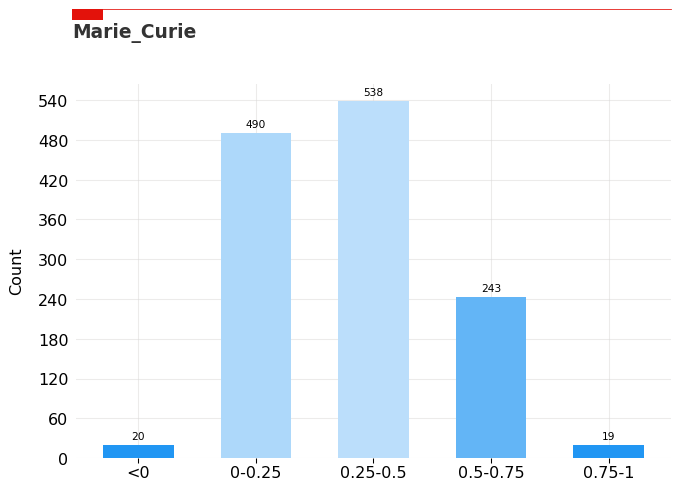

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [26]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Life': -1, 'Early_years': 1880, 'Life_in_Paris': 1894, 'New_elements': 1898, 'Nobel_Prizes': 1911, 'World_War_I': 1915, 'Postwar_years': 1923, 'Death': 1934, 'Legacy': 1895, 'Honours_and_tributes': 1944, 'In_popular_culture': 2013, 'See_also': -1, 'Notes': -1, 'References': -1, 'Further_reading': -1, 'Nonfiction': -1, 'Fiction': -1}


In [27]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [28]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


111


In [29]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Early_years   ->  24
Life_in_Paris   ->  84
New_elements   ->  65
Nobel_Prizes   ->  85
World_War_I   ->  64
Postwar_years   ->  72
Death   ->  73
Legacy   ->  78
Honours_and_tributes   ->  82
In_popular_culture   ->  54


In [30]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [31]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Early_years  ->   ['Warsaw_University_1879', 'Polandoriginated_1879', 'Polish_1879', 'Herpredicament_Maria_1879', 'Maria_1879']
Life_in_Paris  ->   ['Anatomy_And_Physiology_1879', 'Women_1879', 'Foreign_Women_1900', 'Paris_Train_Stations_1900', 'Women_Students_1879']
New_elements  ->   ['Radioactive_Substance_1898', 'Discoveries_1898', 'Marie_Notedthe_Discovery_1898', 'Marie_Curie_1898', 'Marie_Curiedifferent_Components_1898']
Nobel_Prizes  ->   ['Radium_Bydistillation_1911', 'Metallic_Radium_1911', 'Radium_Experiments_1911', 'Pure_Radium_1911', 'Controversy_1911']
World_War_I  ->   ['Preferred_To_Wait_1913', 'Allowher_To_Enter_1913']
Postwar_years  ->   ['Marie_Curie_Radium_Fund_Committee_1921', 'Marie_Curie_1921', 'Madame_Curie_1921', 'The118_Marie_Curiefund_1921', 'Curie_Had122_Marie_Curiebeen_1921']
Death  ->   ['Radiumtreatment_1929', 'Radium_1929', 'Marie_Curie_Arrived_1929', 'Radium_Emanation_1929', 'Radium_Exposure_1929']
Legacy  ->   ['Practical_Marie_1897', 'Radioactive_Eleme

In [32]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [33]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [34]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [35]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Curie', 'Maria', 'Marie', 'Marie Curie']
4
{'Early_years': 2, 'Life_in_Paris': 0, 'New_elements': 2, 'Nobel_Prizes': 0, 'World_War_I': 0, 'Postwar_years': 1, 'Death': 1, 'Legacy': 1, 'Honours_and_tributes': 0, 'In_popular_culture': 1}


In [36]:
print(sum(list(mp2.values())))

8


In [37]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Early_years': set(), 'Life_in_Paris': set(), 'New_elements': set(), 'Nobel_Prizes': set(), 'World_War_I': set(), 'Postwar_years': set(), 'Death': set(), 'Legacy': set(), 'Honours_and_tributes': set(), 'In_popular_culture': set()}
{'Early_years': 0, 'Life_in_Paris': 0, 'New_elements': 0, 'Nobel_Prizes': 0, 'World_War_I': 0, 'Postwar_years': 0, 'Death': 0, 'Legacy': 0, 'Honours_and_tributes': 0, 'In_popular_culture': 0}
0


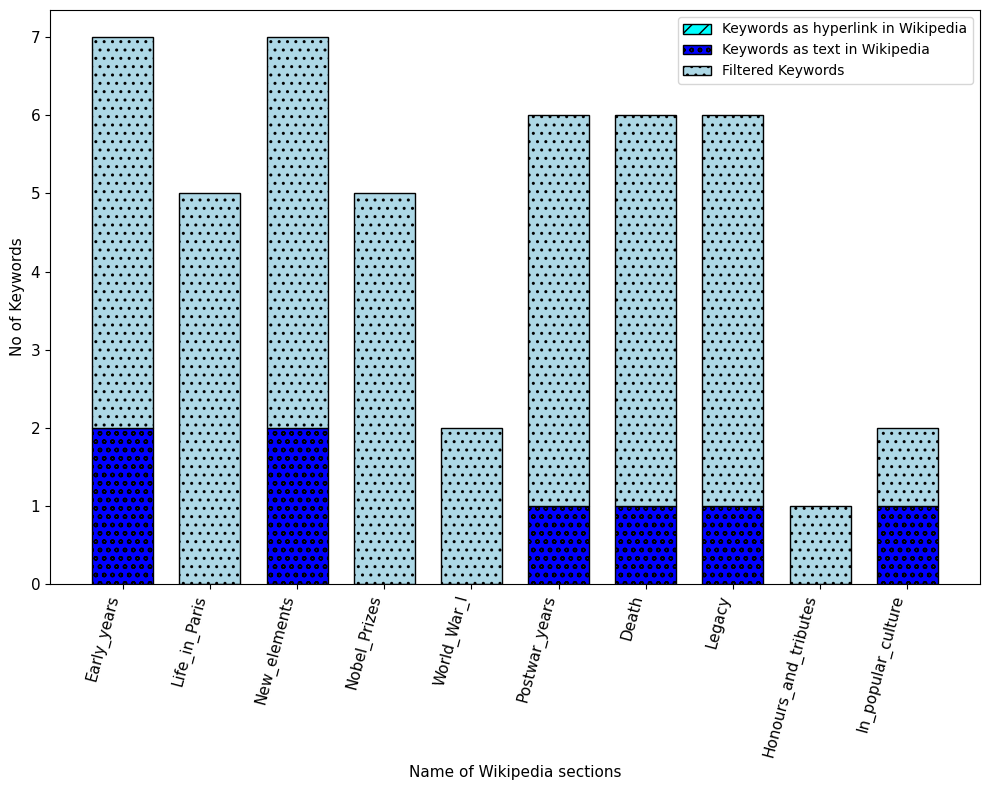

In [38]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [39]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Radioactive_Elements', 'Herpredicament_Maria', 'Radium', 'Radium_Emanation', 'Curie', '1897When_Marie', 'Practical_Marie', 'Women', 'Radiumtreatment', 'The118_Marie_Curiefund', 'Radium_Exposure', 'Marie', 'Controversy', 'Radioactive_Substance', 'Discoveries', 'Maria', 'Madame_Curie', 'Mariawould_Find', 'Women_Students', 'Polandoriginated', 'Marie_Curie_Radium_Fund_Committee', 'Polish', 'Radium_Bydistillation', 'Radium_Experiments', 'Anatomy_And_Physiology', 'Marie_Curie', 'Paris_Train_Stations', 'Pure_Radium', 'Allowher_To_Enter', 'Metallic_Radium', 'Marie_Curiedifferent_Components', 'Preferred_To_Wait', 'Marie_Curie_Arrived', 'Marie_Notedthe_Discovery', 'Curie_Had122_Marie_Curiebeen', 'Foreign_Women', 'Warsaw_University', 'Maunder_And_Margaret'}


In [40]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

1333
{'J._Michael_Kosterlitz', 'Eugene_Wigner', 'Koichi_Tanaka', 'David_MacMillan', 'Samuel_C._C._Ting', 'Paul_Dirac', 'Royal_Swedish_Academy_of_Sciences', 'LibriVox', 'Earth_observation', 'Google_Doodle', 'File:Lublin_UMCS_Pomnik_Marii_Curie-Sk%C5%82odowskiej.jpg', 'Rudolph_A._Marcus', 'Polykarp_Kusch', 'SARS%E2%80%91CoV%E2%80%912', 'File:1911_Solvay_conference.jpg', 'Category:Articles_with_BNF_identifiers', 'Elias_James_Corey', 'Krak%C3%B3w', 'Percy_Williams_Bridgman', 'Category:Articles_with_WorldCat_Entities_identifiers', 'Rue_Dauphine', 'Amerigo_Vespucci', 'Johann_Heinrich_Lambert', 'J%C3%B3zef_Boguski', 'Poland', 'Horst_Ludwig_St%C3%B6rmer', 'Richard_Feynman', 'List_of_Nobel_laureates_in_Chemistry', 'Ir%C3%A8ne_Joliot-Curie', 'Warsaw_Polytechnic', 'Jane_Setter', 'Andre_Geim', 'Maria_Curie-Sk%C5%82odowska_University', 'Ernest_Lawrence', '%C3%89cole_Normale_Sup%C3%A9rieure', '1911_Nobel_Prize_in_Literature', 'Stokes_(unit)', 'Category:Polish_atheists', 'Richard_Willst%C3%A4tter', '

In [41]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

{'Radium'}


1

In [42]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Curie_Had122_Marie_Curiebeen_1921', 'Paris_Train_Stations_1900', 'Marie_1897', 'Foreign_Women_1900', 'Mariawould_Find_1879', 'Pure_Radium_1911', 'Radium_Bydistillation_1911', 'Marie_Curie_1921', 'Preferred_To_Wait_1913', 'Marie_Curie_Arrived_1929', 'Radium_Experiments_1911', '1897When_Marie_1897', 'Polandoriginated_1879', 'Radioactive_Substance_1898', 'Marie_Curie_Radium_Fund_Committee_1921', 'Radium_Emanation_1929', 'Allowher_To_Enter_1913', 'Practical_Marie_1897', 'Herpredicament_Maria_1879', 'Anatomy_And_Physiology_1879', 'Warsaw_University_1879', 'Maunder_And_Margaret_1897', 'Marie_Curie_1898', 'The118_Marie_Curiefund_1921', 'Radium_Exposure_1929', 'Women_1879', 'Radioactive_Elements_1903', 'Radiumtreatment_1929', 'Marie_Notedthe_Discovery_1898', 'Women_Students_1879', 'Madame_Curie_1921', 'Marie_Curiedifferent_Components_1898', 'Controversy_1911', 'Curie_1865', 'Radium_1929', 'Metallic_Radium_1911', 'Discoveries_1898', 'Maria_1879', 'Polish_1879'}


In [43]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Marie_Curie_1898': ['1/chapter_5'], 'Marie_Curie_1921': ['1/chapter_10'], 'Maria_1879': ['1/chapter_2'], 'Curie_1865': ['1/chapter_1'], 'Women_1879': ['1/chapter_2'], 'Women_Students_1879': ['1/chapter_2'], 'Polandoriginated_1879': ['1/chapter_2'], 'Polish_1879': ['1/chapter_2'], 'Herpredicament_Maria_1879': ['1/chapter_2'], 'Warsaw_University_1879': ['1/chapter_2'], 'Anatomy_And_Physiology_1879': ['1/chapter_2'], 'Mariawould_Find_1879': ['1/chapter_2'], 'Paris_Train_Stations_1900': ['1/chapter_3'], 'Marie_1897': ['1/chapter_4'], 'Madame_Curie_1921': ['1/chapter_10'], 'Foreign_Women_1900': ['1/chapter_3'], 'Maunder_And_Margaret_1897': ['1/chapter_4'], '1897When_Marie_1897': ['1/chapter_4'], 'Practical_Marie_1897': ['1/chapter_4'], 'Marie_Notedthe_Discovery_1898': ['1/chapter_5'], 'Discoveries_1898': ['1/chapter_5'], 'Radioactive_Substance_1898': ['1/chapter_5'], 'Marie_Curiedifferent_Components_1898': ['1/chapter_5'], 'Radioactive_Elements_1903': ['1/chapter_6'], 'Controversy_1911': 

In [44]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['curie had122 marie curiebeen', 'paris train stations', 'marie', 'foreign women', 'mariawould find', 'pure radium', 'radium bydistillation', 'marie curie', 'preferred to wait', 'marie curie arrived', 'radium experiments', '1897when marie', 'polandoriginated', 'radioactive substance', 'marie curie radium fund committee', 'radium emanation', 'allowher to enter', 'practical marie', 'herpredicament maria', 'anatomy and physiology', 'warsaw university', 'maunder and margaret', 'marie curie', 'the118 marie curiefund', 'radium exposure', 'women', 'radioactive elements', 'radiumtreatment', 'marie notedthe discovery', 'women students', 'madame curie', 'marie curiedifferent components', 'controversy', 'curie', 'radium', 'metallic radium', 'discoveries', 'maria', 'polish']


In [45]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

13
39
0.3333333333333333
